Exercise 1
You've just been hired at a wine company and they would like you to help them build a model that predicts the quality of their wine based on several measurements. They give you a dataset with wine

- Load the ../data/wines.csv into Pandas
- Use the column called "Class" as target
- Check how many classes are there in target, and if necessary use dummy columns for a multi-class classification
- Use all the other columns as features, check their range and distribution (using seaborn pairplot)
- Rescale all the features using either MinMaxScaler or StandardScaler
- Build a deep model with at least 1 hidden layer to classify the data
- Choose the cost function, what will you use? Mean Squared Error? Binary Cross-Entropy? Categorical Cross-Entropy?
- Choose an optimizer
- Choose a value for the learning rate, you may want to try with several values
- Choose a batch size
- Train your model on all the data using a validation_split=0.2. Can you converge to 100% validation accuracy?
- What's the minumum number of epochs to converge?
- Repeat the training several times to verify how stable your results are

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
data = pd.read_csv(filepath_or_buffer=r'./wine.csv')
data.head(3)

,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280-OD315_of_diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185


In [9]:
X = data.drop(columns=['Class'])
y = data['Class']

In [10]:
y.value_counts()

2    71
1    59
3    48
Name: Class, dtype: int64

In [11]:
y = pd.get_dummies(y)
y.head(3)

,1,2,3
0,1,0,0
1,1,0,0
2,1,0,0


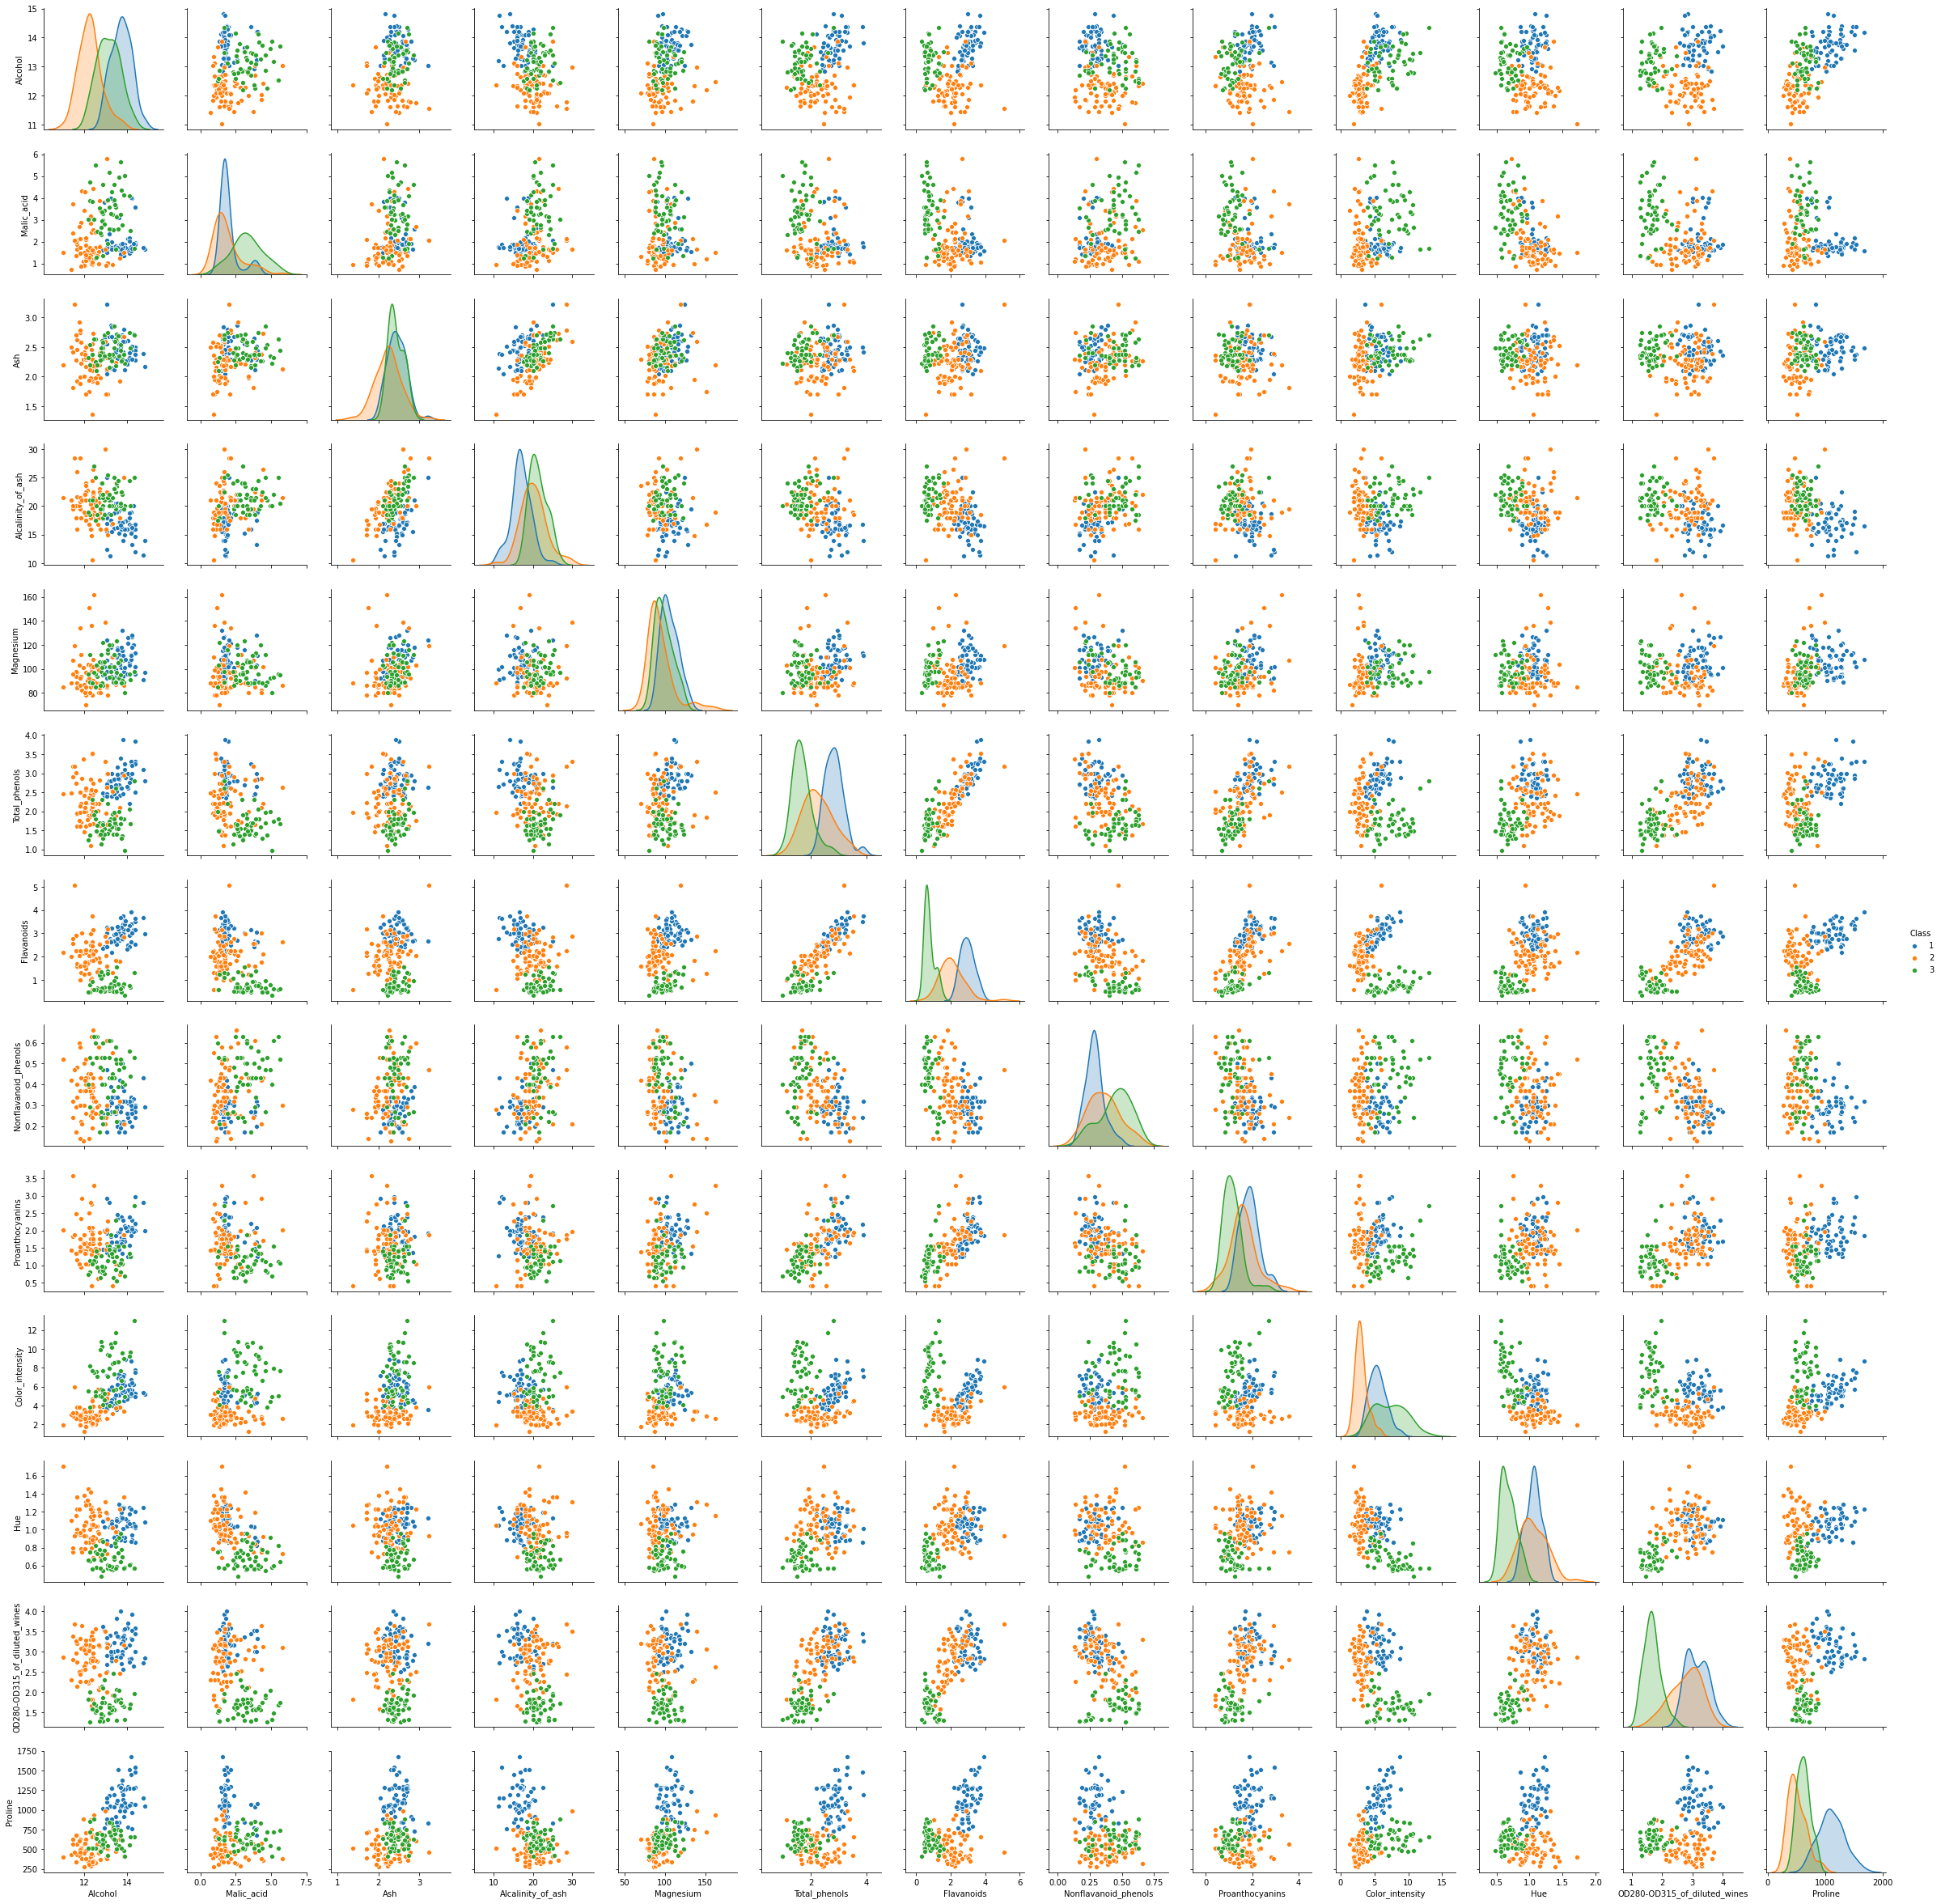

In [13]:
sns.pairplot(data, hue='Class')

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [17]:
stdsclr = StandardScaler()
minmxsclr = MinMaxScaler()
X_std = stdsclr.fit_transform(X)
X_minmx = minmxsclr.fit_transform(X)

In [20]:
from keras.models import Sequential
from keras.layers import Dense

In [47]:
model = Sequential()
model.add(Dense(units=6, input_shape=(X.shape[1],), kernel_initializer='glorot_uniform', activation='tanh'))
model.add(Dense(units=3, activation='softmax'))

In [48]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [49]:
model.fit(x=X_std, y=y.to_numpy(), batch_size=7, epochs=25, validation_split=.2, verbose=1)

Train on 142 samples, validate on 36 samples
Epoch 1/25
142/142 [==============================] - 1s 6ms/step - loss: 0.8211 - acc: 0.6690 - val_loss: 0.4282 - val_acc: 0.9722
Epoch 2/25
142/142 [==============================] - 0s 390us/step - loss: 0.7053 - acc: 0.8099 - val_loss: 0.3657 - val_acc: 1.0000
Epoch 3/25
142/142 [==============================] - 0s 338us/step - loss: 0.6188 - acc: 0.8521 - val_loss: 0.3244 - val_acc: 1.0000
Epoch 4/25
142/142 [==============================] - 0s 366us/step - loss: 0.5522 - acc: 0.8803 - val_loss: 0.2923 - val_acc: 1.0000
Epoch 5/25
142/142 [==============================] - 0s 366us/step - loss: 0.4987 - acc: 0.9014 - val_loss: 0.2620 - val_acc: 1.0000
Epoch 6/25
142/142 [==============================] - 0s 338us/step - loss: 0.4536 - acc: 0.9085 - val_loss: 0.2409 - val_acc: 1.0000
Epoch 7/25
142/142 [==============================] - 0s 366us/step - loss: 0.4160 - acc: 0.9225 - val_loss: 0.2272 - val_acc: 1.0000
Epoch 8/25
142/142 

In [40]:
model.fit(x=X_minmx, y=y.to_numpy(), batch_size=8, epochs=25, validation_split=.2, verbose=1)

Train on 142 samples, validate on 36 samples
Epoch 1/25
142/142 [==============================] - 1s 4ms/step - loss: 0.6992 - acc: 0.5845 - val_loss: 1.6718 - val_acc: 0.0000e+00
Epoch 2/25
142/142 [==============================] - 0s 282us/step - loss: 0.6145 - acc: 0.7324 - val_loss: 1.5376 - val_acc: 0.0000e+00
Epoch 3/25
142/142 [==============================] - 0s 310us/step - loss: 0.5601 - acc: 0.8239 - val_loss: 1.4524 - val_acc: 0.0000e+00
Epoch 4/25
142/142 [==============================] - 0s 254us/step - loss: 0.5305 - acc: 0.8662 - val_loss: 1.3881 - val_acc: 0.0000e+00
Epoch 5/25
142/142 [==============================] - 0s 338us/step - loss: 0.5107 - acc: 0.8944 - val_loss: 1.3371 - val_acc: 0.0278
Epoch 6/25
142/142 [==============================] - 0s 310us/step - loss: 0.4957 - acc: 0.8944 - val_loss: 1.2631 - val_acc: 0.0556
Epoch 7/25
142/142 [==============================] - 0s 310us/step - loss: 0.4809 - acc: 0.9014 - val_loss: 1.2257 - val_acc: 0.1389
Epo